## <center>Universidade do Estado do Amazonas</center>
#### <center>Escola Superior de Tecnologia</center>
##### <center>Pós-graduação Lato Sensu em Ciência de Dados</center>
##### <center>Aquisição, Pré-Processamento e Exploração de Dados (Turma 02)</center>
---
## <center>Trabalho Final</center>
##### <center>Professor: <a href="" target="_blank">PhD. LUIS CUEVAS RODRIGUEZ</a></center>
###### <center>Equipe 3**: Daniel Soares, Leonardo Rocha, Klemerson Castro e Heryck Michael Corrêa</center>

# **1. Objetivo**

Trabalho final de curso com o objetivo de utilizar as técnicas de Ciência de Dados para responder questões interessantes para um Negócio aplicando as técnicas de Coleta de Dados, aplicar métodos de pré-processamento de dados, explorar os dados e responder as questões definidas pela Equipe 

### **1.1. Pergunta Chave do Negócio** 
**A.** Existe relação entre o volume de pesquisas sobre termos referente ao Covid-19 no Google e os novos casos de covid no Brasil e Amazonas?

**B.** Avaliar se os dados disponibilizados pelo Google Trends, relacionado com o Corona Virus podem ser usados por planejadores de políticas públicas para relacionar as pesquisas realizadas com os dados oficiais do Governo.

### **1.2. Introdução**

Quando adoecemos, muitos de nós recorremos ao Google para entender nossos sintomas e opções de tratamento. As buscas online por informações médicas cresceram junto com a taxa de acesso à internet, que hoje chega a 59% em todo o mundo . Começando com o exame de surtos de gripe , os pesquisadores descobriram que a atividade de pesquisa do Google muitas vezes imita a carga real de doenças. Além disso, como as pessoas pesquisam online por informações sobre os sintomas antes (ou em vez de) acessar o atendimento médico, a atividade de pesquisa online dos sintomas pode preceder os surtos de doenças observados . Isso significa que a atividade de pesquisa pode potencialmente usado como um sistema de alerta precoce. Os alertas precoces podem ajudar governos e profissionais de saúde a mobilizar recursos e se preparar para responder - o que é particularmente crucial durante a pandemia COVID-19.
Muitas pesquisas disponiveis na internet mostraram que a atividade de pesquisa do Google está correlacionada com a incidência de várias outras doenças, incluindo dengue, diabetes , Ebola , Zika, entre outras.

---

### Clonando repositório do github (Para leitura dos dados)

In [4]:
! git clone https://github.com/Klemersoncastro/google_trends_covid
%cd google_trends_covid/dados

fatal: destination path 'google_trends_covid' already exists and is not an empty directory.
/content/google_trends_covid/dados


#### Instalando pacotes

In [5]:
! pip install pytrends

#### Importando as bibliotecas

In [6]:
import pandas as pd
import time
from pytrends.request import TrendReq
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# **2 -  Coletando os dados**

### **2.1 - Coletando os dados dos casos de Covid-19**

In [7]:
#Lendo base de dados do covid
df_covid = pd.read_csv('casos_covid.csv', index_col=0)

In [ ]:
df_covid

### **2.2 - Coletando as trends de volume de pesquisa sobre os sintomas de covid-19**

In [8]:
pytrends = TrendReq()

In [9]:
# Definindo palavras chaves
list_keywords = ['covid','coronavirus','falta de ar','febre','tosse','perda paladar','perda olfato']

#### **2.2.1 - Coletando as trends semanais do Brasil e do Amazonas**

In [10]:
'''
Função:
  - Retorna um dataframe com as trends de todas as palavras passadas como parâmetro em list_keywords.
Parâmetros:
  Serão repassados para a função pytrends.build_payload()
  - list_keywords: Lista de palavras chaves para a coleta das trends.
  - timeframe: Intervalo para a coleta das trends
  - geo: Localização da pesquisa
'''
def get_trends(list_keywords, timeframe, geo) :
  list_dataframe_trends = [] 
  # Coleta as trends de cada uma das palavras e os guarda em uma lista de dataframes (cada trend de uma palavra é um dataframe).
  for keyword in list_keywords :
    pytrends.build_payload(kw_list=[keyword], timeframe=timeframe, geo=geo, gprop='')
    df_trends_keyword = pytrends.interest_over_time()
    list_dataframe_trends.append(df_trends_keyword)
    print(keyword, "- ok")
    time.sleep(3)

  # Concatenando os dataframes de cada palavra/trend em um único dataframe
  df_trends = list_dataframe_trends.pop(0)
  for df_trend in list_dataframe_trends :
    df_trends = pd.concat([df_trends, df_trend], axis=1)
  #df_trends.drop(columns=['isPartial'], inplace=True)

  # Renomeando o nome das colunas
  df_trends.columns = df_trends.columns.str.replace(' ','_')

  return df_trends.reset_index()

In [12]:
# Coletando as trends semanais
df_trendsSemanal_br = get_trends(list_keywords, '2020-01-01 2021-02-27', 'BR')

covid - ok
coronavirus - ok
falta de ar - ok
febre - ok
tosse - ok
perda paladar - ok
perda olfato - ok


In [13]:
# Removendo colunas isPartial
df_trendsSemanal_br.drop(columns=['isPartial'], inplace=True)

In [14]:
# Visualizando as trends semanais do Brasil
df_trendsSemanal_br.iloc[[0,1,2,3,4,-5,-4,-3,-2,-1]]

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato
0,2020-01-05,0,0,26,38,30,0,3
1,2020-01-12,0,0,21,41,27,1,0
2,2020-01-19,0,4,21,46,24,4,1
3,2020-01-26,0,14,21,40,23,2,0
4,2020-02-02,0,5,18,38,27,1,0
55,2021-01-24,72,2,27,40,27,50,42
56,2021-01-31,68,2,27,41,26,29,31
57,2021-02-07,64,2,24,38,27,28,30
58,2021-02-14,70,3,27,45,31,39,41
59,2021-02-21,92,3,26,45,35,48,44


#### **2.2.2 - Coletando as trends diárias do Brasil e do Amazonas**

In [15]:
# Coletando as trends diárias do Brasil e Amazonas(coleta de até 8 meses para vir de forma diária, ou seja, dividindo a coleta em duas partes.)
print('Trends do Brasil')
df_trendsDiario_br = get_trends(list_keywords, '2020-07-01 2021-02-28', 'BR')

Trends do Brasil
covid - ok
coronavirus - ok
falta de ar - ok
febre - ok
tosse - ok
perda paladar - ok
perda olfato - ok


In [16]:
# Removendo algumas colunas desnecessárias
df_trendsDiario_br.drop(columns=['isPartial'], inplace=True)

In [17]:
# Visualizando as trends diárias do Brasil
df_trendsDiario_br

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato
0,2020-07-01,69,73,65,70,56,27,54
1,2020-07-02,69,71,67,70,62,32,36
2,2020-07-03,71,72,61,60,57,48,49
3,2020-07-04,69,71,67,74,78,100,55
4,2020-07-05,66,73,66,73,66,35,32
...,...,...,...,...,...,...,...,...
238,2021-02-24,78,22,46,74,73,82,49
239,2021-02-25,84,22,49,79,84,24,19
240,2021-02-26,98,24,63,75,58,38,18
241,2021-02-27,100,24,75,96,100,19,44


---

# **3 - Organizando os dados**

### **3.1 - Juntando as Trends e os Casos de Covid-19 no mesmo dataframe <br> Casos diários**

In [18]:
#Selecionando apenas as colunas de interesse do covid
df_covid_brasil = df_covid[(df_covid['place_type']=='state') & (df_covid['date']>='2020-07-01') & (df_covid['date']<='2021-02-28')][['date','new_confirmed','new_deaths']]

In [19]:
# Agrupando os casos de covid por dia / casos diários
df_covidDiario_br = df_covid_brasil.groupby(by=['date']).sum().reset_index()

In [20]:
# Visualizando os campos selecionados dos casos de covid
df_covidDiario_br

,date,new_confirmed,new_deaths
0,2020-07-01,46825,1086
1,2020-07-02,44401,1259
2,2020-07-03,42854,1213
3,2020-07-04,33297,1061
4,2020-07-05,25648,555
...,...,...,...
238,2021-02-24,65387,1446
239,2021-02-25,68141,1576
240,2021-02-26,63530,1340
241,2021-02-27,58418,1252


In [21]:
# Mudando as datas dos casos de covid para o tipo date
df_covidDiario_br['date'] = pd.to_datetime(df_covidDiario_br['date'])

In [22]:
# Visualizando Trends de volume de pesquisa diária sobre o Covid no Brasil
df_trendsDiario_br

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato
0,2020-07-01,69,73,65,70,56,27,54
1,2020-07-02,69,71,67,70,62,32,36
2,2020-07-03,71,72,61,60,57,48,49
3,2020-07-04,69,71,67,74,78,100,55
4,2020-07-05,66,73,66,73,66,35,32
...,...,...,...,...,...,...,...,...
238,2021-02-24,78,22,46,74,73,82,49
239,2021-02-25,84,22,49,79,84,24,19
240,2021-02-26,98,24,63,75,58,38,18
241,2021-02-27,100,24,75,96,100,19,44


In [23]:
# Juntando as trends com os casos de covid no mesmo dataframe
df_casosDiario_br = df_trendsDiario_br.merge(df_covidDiario_br, how='outer', on='date')

In [24]:
# Visualiazando a junção entre as Trends de volume de pesquisa e os casos de covid no Brasil
df_casosDiario_br

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato,new_confirmed,new_deaths
0,2020-07-01,69,73,65,70,56,27,54,46825,1086
1,2020-07-02,69,71,67,70,62,32,36,44401,1259
2,2020-07-03,71,72,61,60,57,48,49,42854,1213
3,2020-07-04,69,71,67,74,78,100,55,33297,1061
4,2020-07-05,66,73,66,73,66,35,32,25648,555
...,...,...,...,...,...,...,...,...,...,...
238,2021-02-24,78,22,46,74,73,82,49,65387,1446
239,2021-02-25,84,22,49,79,84,24,19,68141,1576
240,2021-02-26,98,24,63,75,58,38,18,63530,1340
241,2021-02-27,100,24,75,96,100,19,44,58418,1252


### **3.2 - Juntando as Trends e os casos de Covid-19 no mesmo dataframe <br> Casos semanais**

In [48]:
# Visualizando os casos de diário do Brasil
df_covidSemanal_br.iloc[[0,1,2,3,4,-5,-4,-3,-2,-1]]

,date,new_confirmed,new_deaths
0,2020-01-05,0,0
1,2020-01-12,0,0
2,2020-01-19,0,0
3,2020-01-26,0,0
4,2020-02-02,0,0
55,2021-01-24,358806,7492
56,2021-01-31,322189,7116
57,2021-02-07,314475,7573
58,2021-02-14,327047,7345
59,2021-02-21,380391,8290


In [49]:
# Visualizando as trends de volume de pesquisa semanal do Brasil
df_trendsSemanal_br.iloc[[0,1,2,3,4,-5,-4,-3,-2,-1]]

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato
0,2020-01-05,0,0,26,38,30,0,3
1,2020-01-12,0,0,21,41,27,1,0
2,2020-01-19,0,4,21,46,24,4,1
3,2020-01-26,0,14,21,40,23,2,0
4,2020-02-02,0,5,18,38,27,1,0
55,2021-01-24,72,2,27,40,27,50,42
56,2021-01-31,68,2,27,41,26,29,31
57,2021-02-07,64,2,24,38,27,28,30
58,2021-02-14,70,3,27,45,31,39,41
59,2021-02-21,92,3,26,45,35,48,44


In [50]:
'''
Função para agrupar os casos de covid por semana de acordo com as mesmas semanas das trends.
Parâmetros:
  df_casosDiarioCovid: dataframe de casos de covid diário com as colunas |date|new_confirmed|new_death
  df_trendSemanal: dataframe com as trends semanais.
Return:
  Retorna um dataframe já com as trends e casos de covid juntas. Por semana.
'''
def agruparCasosCovidPorSemana(df_casosDiarioCovid, df_trendSemanal) :
  list_dict_covid_casosPorSemana = []
  data_primeiro_caso_covid = df_casosDiarioCovid['date'].min()
  for data in df_trendSemanal['date'] :
    if pd.to_datetime(data) < pd.to_datetime(data_primeiro_caso_covid) :
      list_dict_covid_casosPorSemana.append({'date':data, 'new_confirmed':0, 'new_deaths':0})
    else :
      list_dict_covid_casosPorSemana.append(
          {'date': data, 
          'new_confirmed': df_casosDiarioCovid[(df_casosDiarioCovid['date']>=pd.to_datetime(data)) & (df_casosDiarioCovid['date']<=pd.to_datetime(data)+timedelta(days=6))]['new_confirmed'].sum(),
          'new_deaths': df_casosDiarioCovid[(df_casosDiarioCovid['date']>=pd.to_datetime(data)) & (df_casosDiarioCovid['date']<=pd.to_datetime(data)+timedelta(days=6))]['new_deaths'].sum()
          }
      )
  return pd.DataFrame(list_dict_covid_casosPorSemana)

In [51]:
# Agrupando os casos de covid por semana de acordo com as semanas das trends
df_covidSemanal_br = agruparCasosCovidPorSemana(df_covidDiario_br, df_trendsSemanal_br)

In [52]:
# Visualizando as 4 primeiras e últimas semanas dos casos de covid no Brasil
df_covidSemanal_br.iloc[[0,1,2,3,-4,-3,-2,-1]]

,date,new_confirmed,new_deaths
0,2020-01-05,0,0
1,2020-01-12,0,0
2,2020-01-19,0,0
3,2020-01-26,0,0
56,2021-01-31,322189,7116
57,2021-02-07,314475,7573
58,2021-02-14,327047,7345
59,2021-02-21,380391,8290


In [53]:
df_trendsSemanal_br.iloc[[0,1,2,3,-4,-3,-2,-1]]

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato
0,2020-01-05,0,0,26,38,30,0,3
1,2020-01-12,0,0,21,41,27,1,0
2,2020-01-19,0,4,21,46,24,4,1
3,2020-01-26,0,14,21,40,23,2,0
56,2021-01-31,68,2,27,41,26,29,31
57,2021-02-07,64,2,24,38,27,28,30
58,2021-02-14,70,3,27,45,31,39,41
59,2021-02-21,92,3,26,45,35,48,44


In [54]:
# Juntando as trends de volume de pesquisa e os casos de covid semanais 
df_casosSemanal_br = df_trendsSemanal_br.merge(df_covidSemanal_br, how='inner', on='date')

In [55]:
# Visualizando as 4 primeiras e últimas semanas das trends e dos casos de covid
df_casosSemanal_br.iloc[[0,1,2,3,-4,-3,-2,-1]]

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato,new_confirmed,new_deaths
0,2020-01-05,0,0,26,38,30,0,3,0,0
1,2020-01-12,0,0,21,41,27,1,0,0,0
2,2020-01-19,0,4,21,46,24,4,1,0,0
3,2020-01-26,0,14,21,40,23,2,0,0,0
56,2021-01-31,68,2,27,41,26,29,31,322189,7116
57,2021-02-07,64,2,24,38,27,28,30,314475,7573
58,2021-02-14,70,3,27,45,31,39,41,327047,7345
59,2021-02-21,92,3,26,45,35,48,44,380391,8290


# **4 - Normalizando os casos e mortes confirmados de covid**

$$x = \frac{x - min(x)}{max(x)-min(x)}$$

In [56]:
'''
Função para normalizar colunas de um dataframe
Parâmetros:
  min: limite mínimo da normalização
  max: limite máximo da normalização
  dataframe: dataframe que possui os dados que serão normalizados
  colunas: array de str com os nomes das colunas que serão normalizadas
Return:
  retorna um dataframe com as colunas normalizadas
'''
def normalizar(min, max, dataframe, colunas) :
  scaler=MinMaxScaler(feature_range=(min,max))
  scaled_data = scaler.fit_transform(dataframe[colunas])
  list_nome_colunas_normalizadas = []
  df = pd.DataFrame(scaled_data, columns=colunas)
  return df 

In [57]:
df_casosDiario_br[['new_confirmed_n','new_deaths_n']] = normalizar(0, 100, df_casosDiario_br, ['new_confirmed','new_deaths'])
df_casosSemanal_br[['new_confirmed_n','new_deaths_n']] = normalizar(0, 100, df_casosSemanal_br, ['new_confirmed','new_deaths'])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [58]:
df_casosDiario_br

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato,new_confirmed,new_deaths,new_confirmed_n,new_deaths_n
1,2020-07-02,69,71,67,70,62,32,36,44401,1259,42.449706,74.721448
2,2020-07-03,71,72,61,60,57,48,49,42854,1213,30.726202,64.136490
3,2020-07-04,69,71,67,74,78,100,55,33297,1061,21.343229,28.899721
4,2020-07-05,66,73,66,73,66,35,32,25648,555,19.883464,38.022284
5,2020-07-06,76,79,75,69,55,41,28,24458,686,47.160206,80.849582
...,...,...,...,...,...,...,...,...,...,...,...,...
238,2021-02-24,78,22,46,74,73,82,49,65387,1446,73.469087,100.000000
239,2021-02-25,84,22,49,79,84,24,19,68141,1576,67.812807,83.565460
240,2021-02-26,98,24,63,75,58,38,18,63530,1340,61.541953,77.437326
241,2021-02-27,100,24,75,96,100,19,44,58418,1252,30.715162,44.011142


Salvando os dataframes

In [59]:
df_casosDiario_br.to_csv('/content/Covid + trend diário Brasil.csv')
df_casosSemanal_br.to_csv('/content/Covid + trend semanal Brasil.csv')

# **5 - Correlação entre as trends e os casos de covid**

In [60]:
df_correlacao_trendsDiaria_CasosCovid = df_casosDiario_br.corr(method='pearson')[['new_confirmed','new_deaths']]
df_correlacao_trendsDiaria_CasosCovid

,new_confirmed,new_deaths
covid,0.549657,0.445178
coronavirus,0.031435,0.270855
falta_de_ar,0.114924,0.140778
febre,0.393067,0.328290
tosse,0.250175,0.115152
perda_paladar,0.084132,0.009837
perda_olfato,0.096748,-0.035491
new_confirmed,1.000000,0.845713
new_deaths,0.845713,1.000000
new_confirmed_n,0.642220,0.615602


In [61]:
df_correlacao_trendsSemanal_CasosCovid = df_casosSemanal_br.corr(method='pearson')[['new_confirmed','new_deaths']].iloc[0:9]
df_correlacao_trendsSemanal_CasosCovid

,new_confirmed,new_deaths
covid,0.374643,0.341379
coronavirus,-0.477540,-0.460753
falta_de_ar,-0.365294,-0.362863
febre,-0.454340,-0.466980
tosse,-0.347112,-0.363749
perda_paladar,0.185902,0.145576
perda_olfato,0.194691,0.139749
new_confirmed,1.000000,0.968717
new_deaths,0.968717,1.000000


---

# **6 - Análise dos dados**

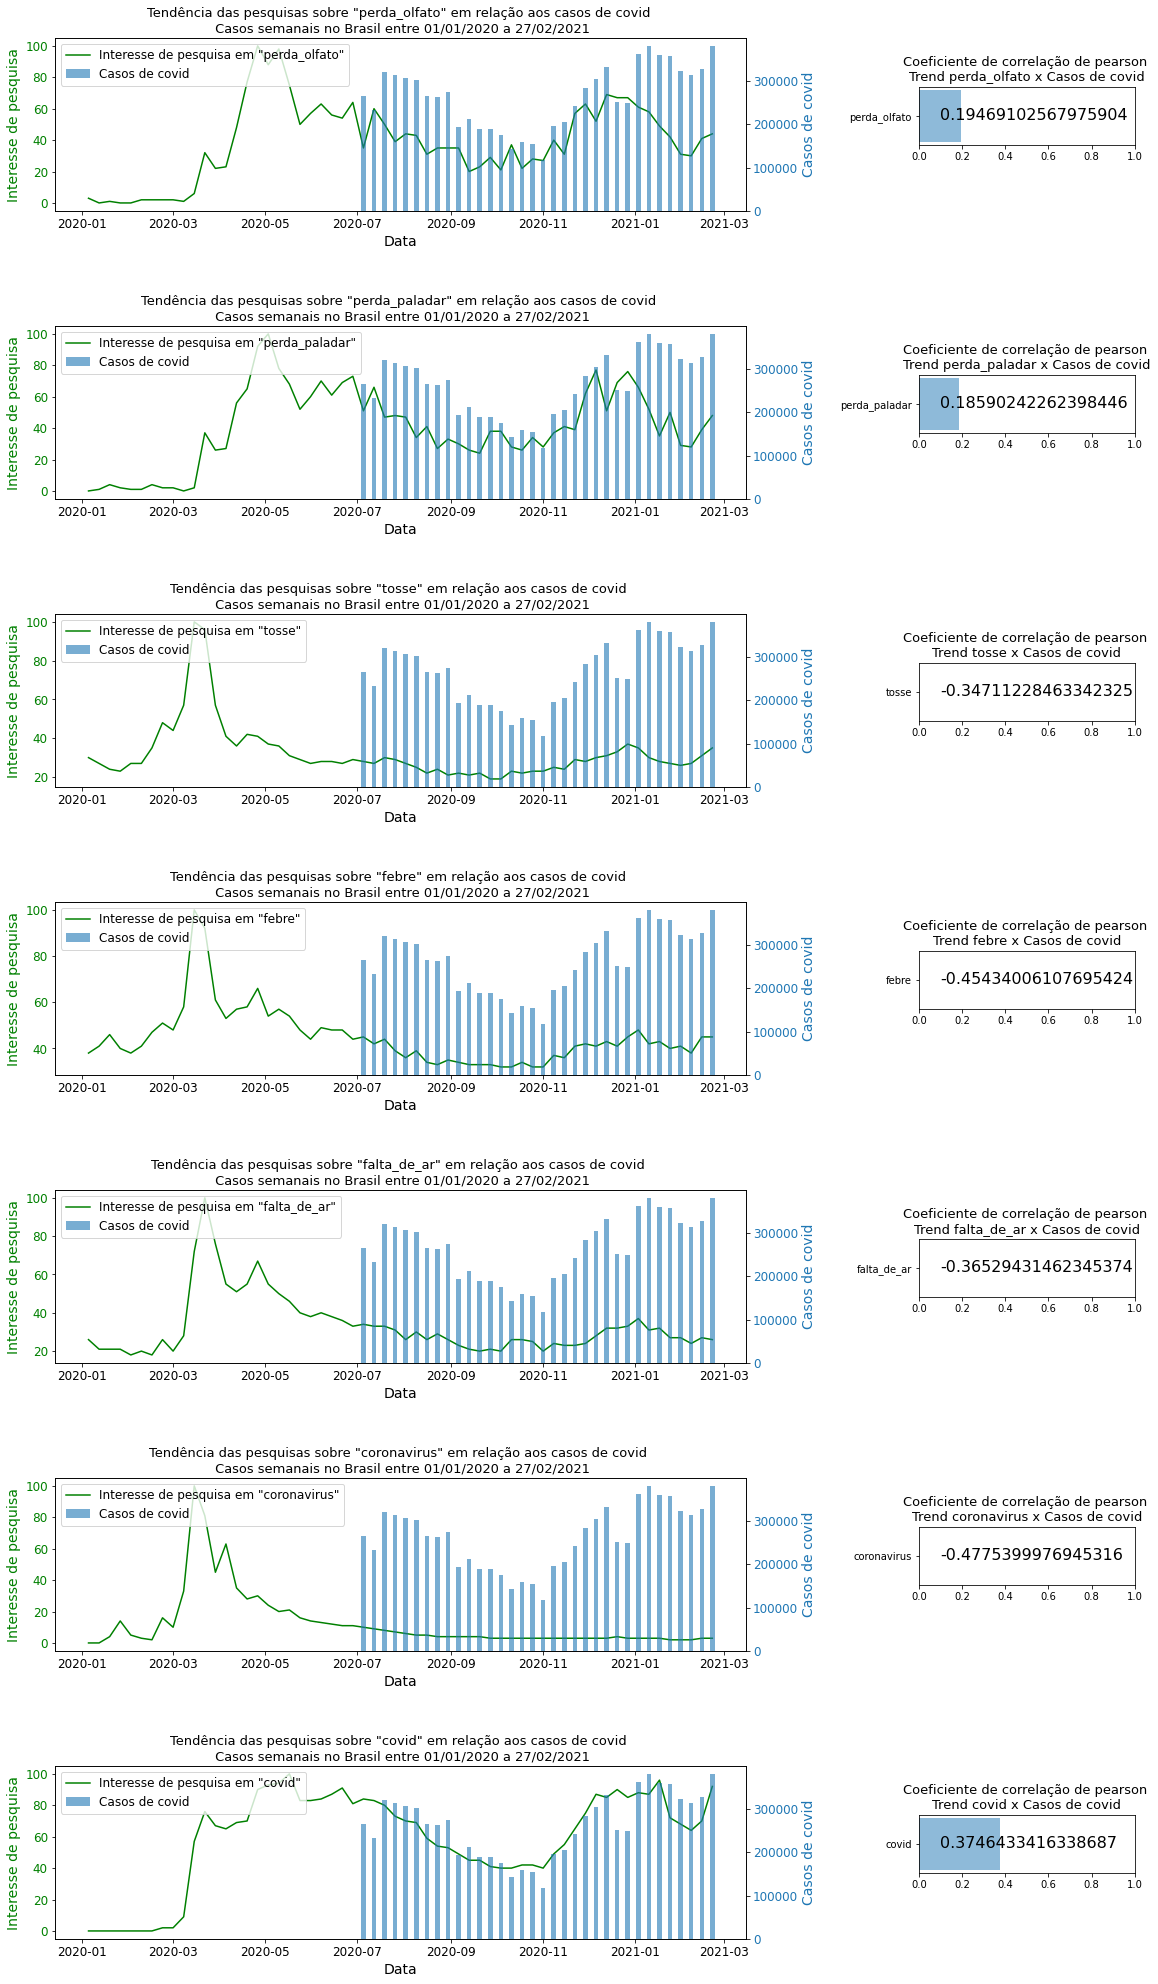

In [62]:
# Mostrando as tendências dos volumes de pesquisa e as correlações com os novos casos de covid
# Casos Semanais no Brasil
keywords = ['covid','coronavirus','falta_de_ar','febre','tosse','perda_paladar','perda_olfato']
i = 1
j = 0
fig = plt.figure()
for keyword in keywords :
  color = 'green'
  ax1 = fig.add_axes([0, 1*i, 1.6, 0.6])
  ax1.set_title('Tendência das pesquisas sobre "' + keyword + '" em relação aos casos de covid \n Casos semanais no Brasil entre 01/01/2020 a 27/02/2021', fontsize=13)
  ax1.plot(df_casosSemanal_br['date'],df_casosSemanal_br[keyword], label='Interesse de pesquisa em "' + keyword + '"', color=color)
  ax1.set_ylabel('Interesse de pesquisa', color=color, fontsize=14)
  ax1.tick_params(axis='y', labelcolor=color, labelsize=12)
  ax1.tick_params(axis='x', which='both', labelsize=12)
  ax1.set_xlabel('Data', fontsize=14)
  
  ax2 = ax1.twinx()
  color = 'tab:blue'
  ax2.bar(df_casosSemanal_br['date'],df_casosSemanal_br['new_confirmed'], alpha=0.6, label='Casos de covid', color=color, width=3)
  ax2.set_ylabel('Casos de covid', color=color, fontsize=14)
  ax2.tick_params(axis='y', labelcolor=color, labelsize=12)


  lines, labels = ax1.get_legend_handles_labels()
  lines2, labels2 = ax2.get_legend_handles_labels()
  ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)

  # Gráfico da correlação
  ax_1 = fig.add_axes([2, 1.23+j, 0.5, 0.2])
  ax_1.set_title('Coeficiente de correlação de pearson \nTrend ' +keyword+ ' x Casos de covid', fontsize=13)
  ax_1.barh(df_correlacao_trendsSemanal_CasosCovid.index[j], df_correlacao_trendsSemanal_CasosCovid['new_confirmed'].iloc[j], alpha=0.5)
  ax_1.text(0.1, keyword, df_correlacao_trendsSemanal_CasosCovid['new_confirmed'].iloc[j], fontsize=16, horizontalalignment='left', verticalalignment='center')
  plt.xlim(0,1)
  i = i + 1
  j = j + 1
fig.show()

In [63]:
df_casosDiario_br = df_casosDiario_br[df_casosDiario_br['date']>'2020-07-01']

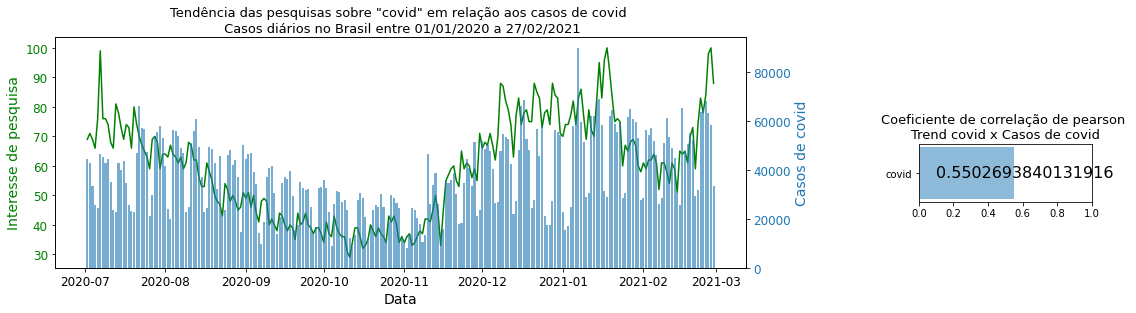

In [44]:
# Mostrando as tendências dos volumes de pesquisa e as correlações com os novos casos de covid
# Casos Diários no Brasil
keywords = ['covid']
i = 1
j = 0
fig = plt.figure()
for keyword in keywords :
  color = 'green'
  ax1 = fig.add_axes([0, 1*i, 1.6, 0.8])
  ax1.set_title('Tendência das pesquisas sobre "' + keyword + '" em relação aos casos de covid \n Casos diários no Brasil entre 01/01/2020 a 27/02/2021', fontsize=13)
  ax1.plot(df_casosDiario_br['date'],df_casosDiario_br[keyword], label='Interesse de pesquisa em "' + keyword + '"', color=color)
  ax1.set_ylabel('Interesse de pesquisa', color=color, fontsize=14)
  ax1.tick_params(axis='y', labelcolor=color, labelsize=12)
  ax1.tick_params(axis='x', which='both', labelsize=12)
  ax1.set_xlabel('Data', fontsize=14)

  ax2 = ax1.twinx()
  color = 'tab:blue'
  ax2.bar(df_casosDiario_br['date'],df_casosDiario_br['new_confirmed'], alpha=0.6, label='Casos de covid', color=color)
  ax2.set_ylabel('Casos de covid', color=color, fontsize=14)
  ax2.tick_params(axis='y', labelcolor=color, labelsize=12)

  #lines, labels = ax1.get_legend_handles_labels()
  #lines2, labels2 = ax2.get_legend_handles_labels()
  #fig.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)

  # Gráfico da correlação
  ax_1 = fig.add_axes([2, 1.23+j, 0.4, 0.2])
  ax_1.set_title('Coeficiente de correlação de pearson \nTrend ' +keyword+ ' x Casos de covid', fontsize=13)
  ax_1.barh(df_correlacao_trendsDiaria_CasosCovid.index[j], df_correlacao_trendsDiaria_CasosCovid['new_confirmed'].iloc[j], alpha=0.5)
  ax_1.text(0.1, keyword, df_correlacao_trendsDiaria_CasosCovid['new_confirmed'].iloc[j], fontsize=16, horizontalalignment='left', verticalalignment='center')
  plt.xlim(0,1)
  i = i + 1
  j = j + 1
fig.show()

In [64]:
df_diferenca_dias = pd.DataFrame(
  {'Trend_covid_pico':[df_casosDiario_br[df_casosDiario_br['covid']==df_casosDiario_br[(df_casosDiario_br['date']>'2020-07-01') & (df_casosDiario_br['date']<'2020-08-01')]['covid'].max()]['date'].iloc[0],
                       df_casosDiario_br[df_casosDiario_br['covid']==df_casosDiario_br[(df_casosDiario_br['date']>'2020-12-01') & (df_casosDiario_br['date']<'2021-01-01')]['covid'].max()]['date'].iloc[0]],   
   'Casos_covid_pico':[df_casosDiario_br[df_casosDiario_br['new_confirmed']==df_casosDiario_br[(df_casosDiario_br['date']>'2020-07-01') & (df_casosDiario_br['date']<'2020-08-01')]['new_confirmed'].max()]['date'].iloc[0],
                        df_casosDiario_br[df_casosDiario_br['new_confirmed']==df_casosDiario_br[(df_casosDiario_br['date']>'2020-12-01') & (df_casosDiario_br['date']<'2021-01-01')]['new_confirmed'].max()]['date'].iloc[0]]
  }, index=['Pico_1','Pico_2']
)
df_diferenca_dias['diferenca_dias'] = df_diferenca_dias['Trend_covid_pico'] - df_diferenca_dias['Casos_covid_pico']
df_diferenca_dias

,Trend_covid_pico,Casos_covid_pico,diferenca_dias
Pico_1,2020-07-07,2020-07-22,-15 days
Pico_2,2020-12-08,2020-12-17,-9 days
